#### 점진적 학습 : 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련한    
#### 경사 하강법 - 손실함수의 경사를 따라 최적의 모델을 찾는 알고리즘
- 확률적 경사 하강법 : 훈련세트에서 랜덤하게 하나의 샘플을 골라 경사를 내려가는 경사 하강법
- 미니배치 경사 하강법 : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
- 배치 경사 하강법 : 전체 데이터를 사용하여 경사로를 이동하는 방식

##### 데이터가 업데이트되어도 학습을 계속 이어나갈 수 있다

#### 손실함수 : 머신러닝의 성능의 손실을 나타내는 함수
- 이진분류에서 주로 사용하는 손실함수 : 로지스틱 손실 함수(이진 크로스엔트로피 손실 함수)
- 다중 분류에서 주로 사용하는 손실함수 : 크로스엔트로피 손실 함수

In [ ]:
# 확률적 경사 하강법을 사용한 분류 모델 만들어보기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier         # 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스


In [ ]:
# 데이터준비

fish = pd.read_csv('http://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [ ]:
# 모델생성

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)         # 파라미터 : loss - 손실함수지정, max_iter - 에포크(학습반복)횟수지정
sc.fit(train_scaled, train_target)
print('1st train sc train:',sc.score(train_scaled, train_target))
print('1st train sc test:',sc.score(test_scaled, test_target))       # 에포크가 부족해 점수가 낮다

1st train sc train: 0.773109243697479
1st train sc test: 0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 모델추가훈련

sc.partial_fit(train_scaled, train_target)  # partial_fit : 모델의 추가 훈련 (점진적 학습)
print('2nd train sc train:',sc.score(train_scaled, train_target))
print('2nd train sc test:',sc.score(test_scaled, test_target))  # 책이랑 왜 결과가 다른지 모르겟다..


2nd train sc train: 0.8151260504201681
2nd train sc test: 0.85


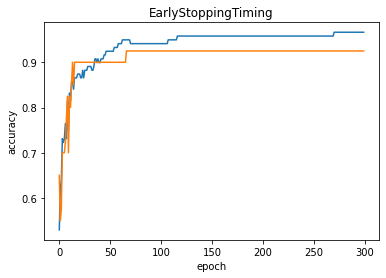

In [ ]:
# earlystopping을위한그래프그리기

sc_es = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score= []
classes = np.unique(train_target)   # np.unique : train_target에 있는 7개의 생선의 목록을 만드는 함수
for _ in range(0,300):
  sc_es.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc_es.score(train_scaled, train_target))
  test_score.append(sc_es.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.title('EarlyStoppingTiming')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 최적의 모델 만들기
sc_f = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)   # 자동적인 earlystopping을 막기 위한 tol=None
sc_f.fit(train_scaled, train_target)
print('final train sc train:',sc_f.score(train_scaled, train_target))
print('final train sc test:',sc_f.score(test_scaled, test_target))

final train sc train: 0.957983193277311
final train sc test: 0.925


In [ ]:
# 서포트 벡터 머신이라는 머신러닝 알고리즘을 위한 손실함수는 힌지손실이다. 